# Machine Learning/Applied Statistics 2018: Project on Machine learning

Python macro for analysing more complex challenge of classifying events (in 2D) using Machine Learning.

***

First, we import the modules we want to use:

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive # to make plots interactive

And set the parameters of the notebook:

In [127]:
r = np.random
r.seed(42)

export_tree = True
plot_fisher_discriminant = True

test_point = np.array([0, 0.5]).reshape(1, -1)

## Functions:

We define `get_corr_pars` which generate (linearly) correlated numbers:

In [128]:
def get_corr_pars(mu1, mu2, sig1, sig2, rho12) : 

    # Transform to correlated random numbers:
    # Note that the absolute value is taken before the square root to avoid sqrt(x) with x < 0.
    theta = 0.5 * np.arctan( 2.0 * rho12 * sig1 * sig2 / ( sig1**2 - sig2**2 ) )
    sigu = np.sqrt( np.abs( ((sig1*np.cos(theta))**2 - (sig2*np.sin(theta))**2 ) / ( np.cos(theta)**2 - np.sin(theta)**2) ) )
    sigv = np.sqrt( np.abs( ((sig2*np.cos(theta))**2 - (sig1*np.sin(theta))**2 ) / ( np.cos(theta)**2 - np.sin(theta)**2) ) )

    u = r.normal(0.0, sigu)
    v = r.normal(0.0, sigv)

    # Transform into (possibly) correlated random Gaussian numbers x1 and x2:
    x1 = mu1 + np.cos(theta)*u - np.sin(theta)*v
    x2 = mu2 + np.sin(theta)*u + np.cos(theta)*v

    return x1, x2

Define the function `plot_decision_regions` which plots decision boundaries:

In [129]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc

def plot_decision_regions(X, y, classifier, resolution=0.02, title=None, fig=None, ax=None):
    
    # define colors
    colors = ('red', 'blue')
    cmap = ListedColormap(colors)
    
    # define signal and background
    sig = X[y == 1]
    bkg = X[y == 0]
    
    # compute the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # set up the figure
    if fig is None and ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    # plot the decision surface and plot individual points on ax[0]
    ax[0].contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    ax[0].scatter(sig[:, 0], sig[:, 1], s=4, c='blue',  label='sig', alpha=0.3)
    ax[0].scatter(bkg[:, 0], bkg[:, 1], s=4, c='red', label='bkg', alpha=0.3)

    ax[0].set(xlim=(xx1.min(), xx1.max()), ylim=(xx2.min(), xx2.max()), xlabel='Parameter A', ylabel='Parameter B')
    
    
    # predict and plot the prediction of the test point on ax[0]
    z_test = classifier.predict(test_point)[0]
    if z_test == 0:
        color = 'red'
    else:
        color = 'blue'
    ax[0].scatter(test_point[0,0], test_point[0,1], c='w', s=200, marker='o')
    ax[0].scatter(test_point[0,0], test_point[0,1], c=color, s=150, marker='*')
   
    # set the legend on ax[0]
    ax[0].legend()
                    
    
    # set up ax[1]:
    z_test = classifier.predict(test_point)[0]
    if z_test == 0:
        color = 'red'
    else:
        color = 'blue'
        ax[1].scatter(test_point[0,0], test_point[0,1], c='w', s=200, marker='o')
        ax[1].scatter(test_point[0,0], test_point[0,1], c=color, s=150, marker='*')
        
    # set the legend on ax[1]
    ax[1].legend()
        
        
    # compute y prediction probabilities:
    y_predicted_proba = classifier.predict_proba(X)[:, 1]
    
    # Compute ROC curve and ROC area
    FPR, TPR, _ = roc_curve(y, y_predicted_proba)
    roc_auc = auc(FPR, TPR)
    
    lw = 2

    # plot the ROC curve
    ax[1].plot(FPR, TPR, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
    ax[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax[1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05], xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax[1].legend(loc="lower right")
  
    if title:
        ax[0].set(title=title)
        ax[1].set(title=title)
        
    return fig, ax

Define `animate_ML_estimator_generator` which takes an estimator, fits it given the specified keywords and plots the decision regions:

In [130]:
def animate_ML_estimator_generator(clf, title, X, y, **kwargs): 
    estimator = clf(**kwargs)
    estimator = estimator.fit(X, y)
    plot_decision_regions(X, y, classifier=estimator, title=title.capitalize())

## Generate and plot data:

Set number of data points to generate and parameters:

In [131]:
N = 10000

mu_sig_A = 0
mu_sig_B = 1
sigma_sig_A = 1.5 
sigma_sig_B = 2
rho_sig = 0.8

mu_bkg_A = -2
mu_bkg_B = 4
bkgma_bkg_A = 1.5 
bkgma_bkg_B = 2
rho_bkg = 0.8

Generate correlated parameters:

In [132]:
sig = np.zeros((N, 2))
for i in range(N):
    x1, x2 = get_corr_pars(mu_sig_A, mu_sig_B, sigma_sig_A, sigma_sig_B, rho_sig) 
    sig[i, :] = x1, x2

bkg = np.zeros((N, 2))
for i in range(N):
    x1, x2 = get_corr_pars(mu_bkg_A, mu_bkg_B, bkgma_bkg_A, bkgma_bkg_B, rho_bkg) 
    bkg[i, :] = x1, x2

Plot the generated random numbers:

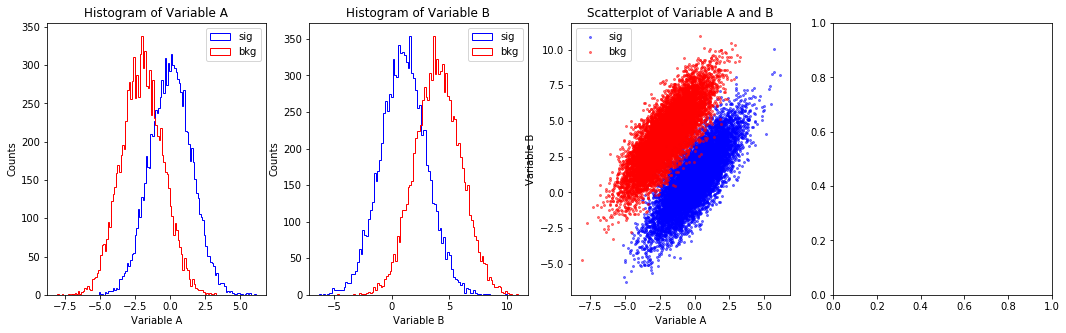

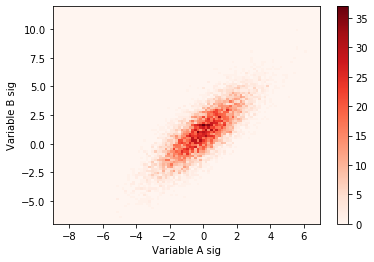

In [133]:
Nbins = 100

fig, ax = plt.subplots(1, 4, figsize=(18, 5))

ax[0].hist(sig[:, 0], Nbins, histtype='step', label='sig', color='blue')
ax[0].hist(bkg[:, 0], Nbins, histtype='step', label='bkg', color='red')
ax[0].set(xlabel='Variable A', ylabel='Counts', title='Histogram of Variable A')
ax[0].legend()

ax[1].hist(sig[:, 1], Nbins, histtype='step', label='sig', color='blue')
ax[1].hist(bkg[:, 1], Nbins, histtype='step', label='bkg', color='red')
ax[1].set(xlabel='Variable B', ylabel='Counts', title='Histogram of Variable B')
ax[1].legend()

ax[2].scatter(sig[:, 0], sig[:, 1], s=4, c='blue',  label='sig', alpha=0.5)
ax[2].scatter(bkg[:, 0], bkg[:, 1], s=4, c='red', label='bkg', alpha=0.5)
ax[2].set(xlabel='Variable A', ylabel='Variable B', title='Scatterplot of Variable A and B')
ax[2].legend()

fig1, ax1 = plt.subplots(1, 1, figsize=(6,4))
h = ax1.hist2d(sig[:, 0], sig[:, 1], (100, 100), ((-9, 7), (-7, 12)), cmap="Reds")
plt.colorbar(h[3], ax=ax1)
ax1.set(xlabel="Variable A sig", ylabel="Variable B sig")
fig1

plt.show()
fig.tight_layout()

## Fishers Discriminant: 
Perform a __[Fishers Linear Discimant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)__ in Scikit Learn.  



First load the proper package:

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Convert the two numpy arrays one big one called `X`. `y` denotes the class (1 for signal, 0 for background)

In [135]:
X = np.vstack((sig, bkg))

y = np.zeros(2*N) 
y[:N] = 1

Do the Linear Discriminant Analysis (LDA):

In [136]:
# initialise the LDA method
sklearn_lda = LDA(n_components=2)

# fit the data
sklearn_lda.fit(X, y)

# transform the data
X_lda_sklearn = sklearn_lda.transform(X) 

#print(f"LDA coefficients: {sklearn_lda.scalings_}")

LDA coefficients: [[ 1.03939976]
 [-0.79035145]]


/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Extract the tranformed variables

In [137]:
sig_lda = X_lda_sklearn[y == 1]
bkg_lda = X_lda_sklearn[y == 0]

and plot it on the figure:

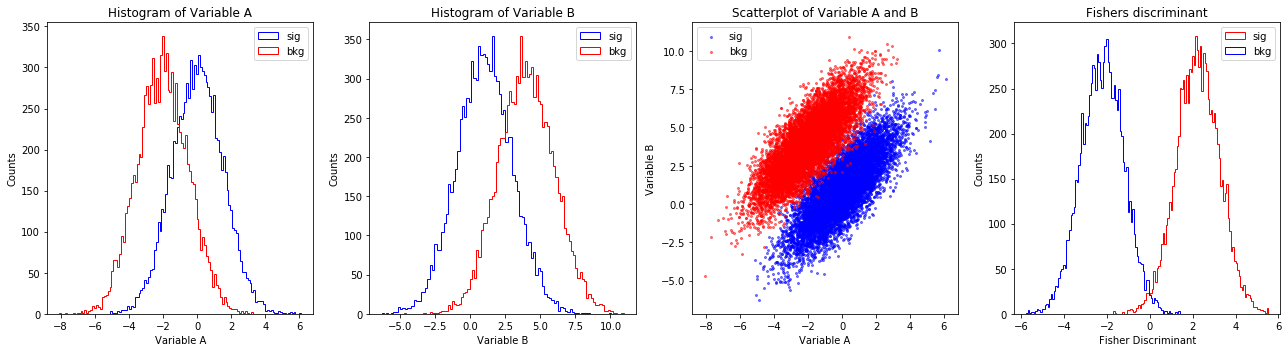

In [138]:
ax[3].hist(sig_lda, Nbins, histtype='step', label='sig', color='red')
ax[3].hist(bkg_lda, Nbins, histtype='step', label='bkg', color='blue')
ax[3].set(xlabel='Fisher Discriminant', ylabel='Counts', title='Fishers discriminant')
ax[3].legend()

fig.tight_layout()

fig

# What if the dataset was completely different?

Examine the dataset given in `DataSet_ML.txt`. First we load it, extract the relevant data and plot it:


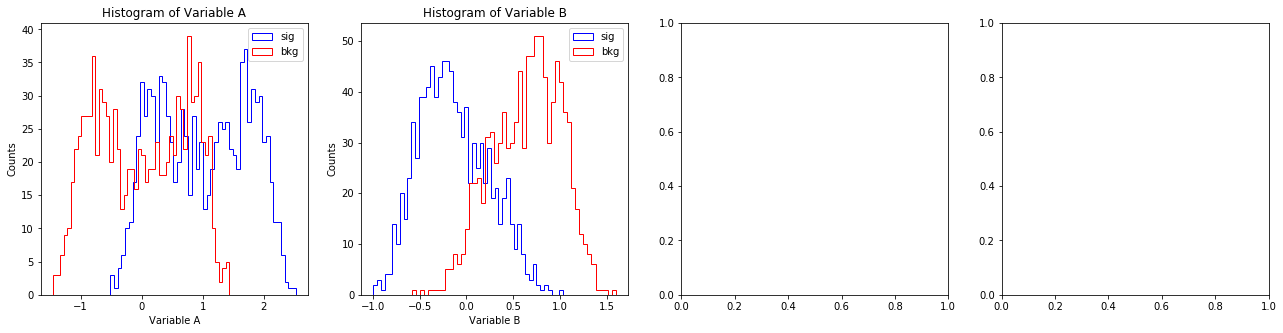

In [139]:
# load the data
data = np.loadtxt('DataSet_ML.txt')
N = len(data)
Nbins = 50

# data
X = data[:, :2]
y = data[:, 2]

# as signal and background
sig = X[y == 1]
bkg = X[y == 0]

fig2, ax2 = plt.subplots(1, 4, figsize=(22, 5))
ax2[0].hist(sig[:, 0], Nbins, histtype='step', label='sig', color='blue')
ax2[0].hist(bkg[:, 0], Nbins, histtype='step', label='bkg', color='red')
ax2[0].set(xlabel='Variable A', ylabel='Counts', title='Histogram of Variable A')
ax2[0].legend()

ax2[1].hist(sig[:, 1], Nbins, histtype='step', label='sig', color='blue')
ax2[1].hist(bkg[:, 1], Nbins, histtype='step', label='bkg', color='red')
ax2[1].set(xlabel='Variable B', ylabel='Counts', title='Histogram of Variable B')
ax2[1].legend();

### The above data in 2D:

/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


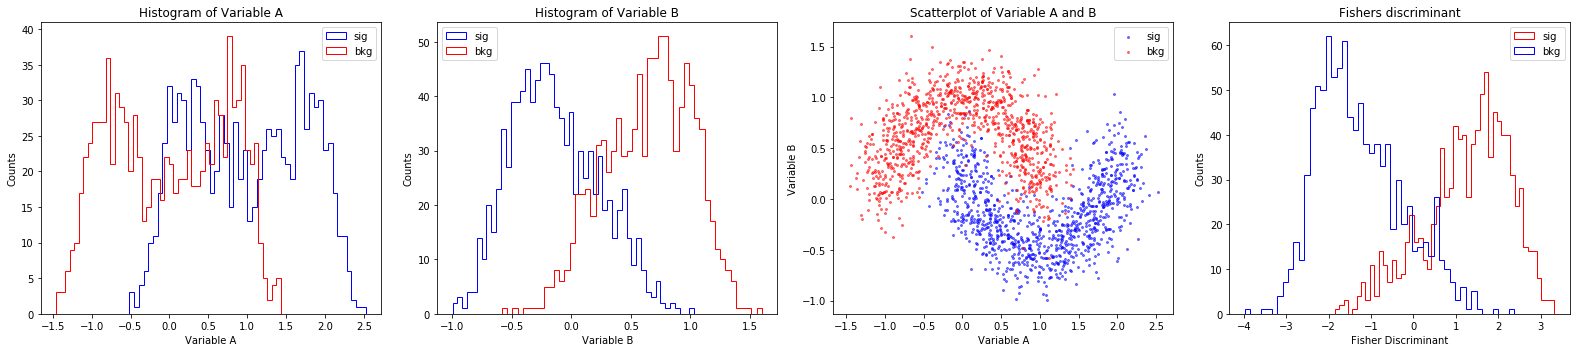

In [140]:
ax2[2].scatter(sig[:, 0], sig[:, 1], s=4, c='blue',  label='sig', alpha=0.5)
ax2[2].scatter(bkg[:, 0], bkg[:, 1], s=4, c='red', label='bkg', alpha=0.5)
ax2[2].set(xlabel='Variable A', ylabel='Variable B', title='Scatterplot of Variable A and B')
ax2[2].legend()

# initialise the LDA method
sklearn_lda = LDA(n_components=2)

# fit the data
sklearn_lda.fit(X, y)

# transform the data
X_lda_sklearn = sklearn_lda.transform(X) 

sig_lda = X_lda_sklearn[y == 1]
bkg_lda = X_lda_sklearn[y == 0]

ax2[3].hist(sig_lda, Nbins, histtype='step', label='sig', color='red')
ax2[3].hist(bkg_lda, Nbins, histtype='step', label='bkg', color='blue')
ax2[3].set(xlabel='Fisher Discriminant', ylabel='Counts', title='Fishers discriminant')
ax2[3].legend()

fig2.tight_layout()

fig2

# Interactive Machine Learning Part: 
***
Further investigate different standard ML models.  

## Linear Fisher Discriminant:

First we look at __[Linear Fisher Discriminant](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)__. This is the same as we saw above.

/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
No handles with labels found to put in legend.


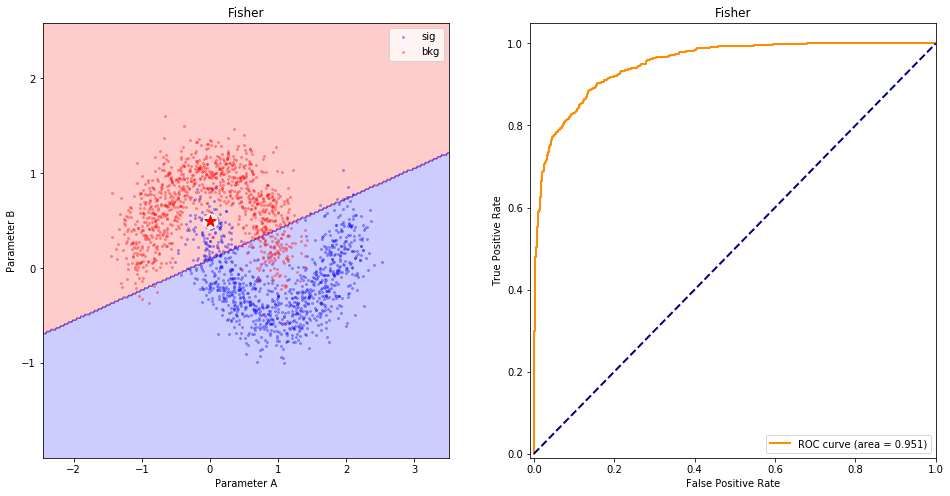

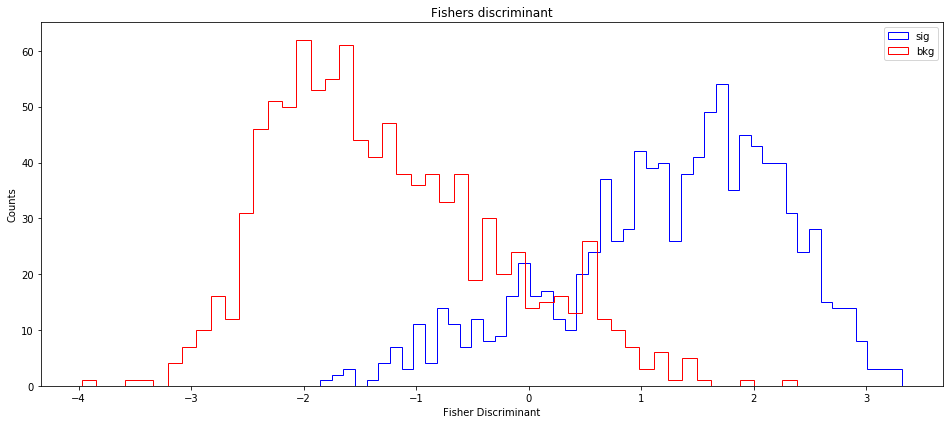

In [141]:
# LDA
clf_fisher = LDA(n_components=2) # initialise the LDA method
clf_fisher.fit(X, y) # fit the data
X_fisher = clf_fisher.transform(X) # transform the data
#print("LDA coefficients", clf_fisher.scalings_)

# Extract the tranformed variables
sig_fisher = X_fisher[y == 1]
bkg_fisher = X_fisher[y == 0]

# plot decision region of fisher
fig_fisher, ax_fisher = plot_decision_regions(X, y, classifier=clf_fisher, title='Fisher')

if plot_fisher_discriminant:

    # plot fisher discriminant 
    fig_fisher2, ax_fisher2 = plt.subplots(figsize=(13.3, 6))
    ax_fisher2.hist(sig_fisher, Nbins, histtype='step', label='sig', color='blue')
    ax_fisher2.hist(bkg_fisher, Nbins, histtype='step', label='bkg', color='red')
    ax_fisher2.set(xlabel='Fisher Discriminant', ylabel='Counts', title='Fishers discriminant')
    ax_fisher2.legend()
    fig_fisher2.tight_layout()
    

***
## Decision Trees

We can try to increase the `max_depth` slider and see how that affects the plots. 
***
The max depth is int or None (default): The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

### If I want a simpler model then: 
In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting in decision trees because your model will fit perfectly for the training data and will not be able to generalize well on test set. So, if your model is overfitting, reducing the number for max_depth is one way to combat overfitting. 

Finally, given a set of values for `max_depth` and `min_samples_leaf` switch between `criterion` being `gini` and `entropy`.

In [142]:
from sklearn.tree import DecisionTreeClassifier

def animate_ML_estimator_DT(criterion, min_samples_leaf=1, max_depth=1):
    animate_ML_estimator_generator(DecisionTreeClassifier, 'Decision Tree', X, y, 
                                   max_depth=max_depth, 
                                   criterion=criterion,
                                   #splitter=splitter,
                                   #min_samples_split=min_samples_split, 
                                   min_samples_leaf=min_samples_leaf)

kwargs_DT = { 'max_depth': (1, 50), 
              'criterion': ["gini", "entropy"], 
              #'splitter': ["best", "random"], 
              #'min_samples_split': (2, 50),
              'min_samples_leaf': (1, 50),
            }    


interactive_plot = interactive(animate_ML_estimator_DT, **kwargs_DT)
interactive_plot

interactive(children=(Dropdown(description='criterion', options=('gini', 'entropy'), value='gini'), IntSlider(…

***
## Boosted Decision Trees (BDTs)

For __[BDTs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)__ try to slowly increase `n_estimators` and see how it affects the model. Also to increase the learning rate and see what that changes:


In [143]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def animate_ML_estimator_BDT(learning_rate=1., n_estimators=1):
    animate_ML_estimator_generator(AdaBoostClassifier, 'Boosted Decision Trees', X, y, 
                                   learning_rate=learning_rate, # scales the contribution of each tree
                                                                # If you set it to a low value, you will need more trees in the ensemble to fit the training set
                                                                # but the overall variance will be lower.
                                                                # The lower the learning rate, the slower the model learns. 
                                                                # The advantage of slower learning rate is that the model becomes more robust and generalized.
                                   n_estimators=n_estimators, # refers to the total number of trees in the ensemble
                                   )

kwargs_BDT = {'learning_rate': (0.01, 2, 0.01), 
              'n_estimators': (1, 100),
            }    

interactive_plot = interactive(animate_ML_estimator_BDT, **kwargs_BDT)
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='learning_rate', max=2.0, min=0.01, step=0.01), IntSl…

## k-Nearest Neighbours

For __[kNNs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)__ we only have the parameter n_neighbors to change where we see that as we increase the number of neighbors, we get a smoother curve.

In [144]:
from sklearn.neighbors import KNeighborsClassifier

def animate_ML_estimator_KNN(n_neighbors=1):
    animate_ML_estimator_generator(KNeighborsClassifier, 'KNN', X, y, n_neighbors=n_neighbors)

kwargs_KNN = {'n_neighbors': (1, 50), 
            }    

interactive_plot = interactive(animate_ML_estimator_KNN, **kwargs_KNN)
interactive_plot

interactive(children=(IntSlider(value=1, description='n_neighbors', max=50, min=1), Output()), _dom_classes=('…

## Support Vector Machine (SVM):

__[SVms](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)__ are quite different ML models than the rest and we won't be going through it in much detail. However, see if you can make sense of the difference between the `RBF` kernel compared to the `poly` one. Also, how much does `C` matter for the different kernels?
Notice that `degree` is only relevant for the `poly` kernel.  

In [145]:
from sklearn.svm import SVC

def animate_ML_estimator_SVM(kernel='rbf', C=1, degree=2, ):
    animate_ML_estimator_generator(SVC, 'SVM', X, y, 
                                   #gamma=gamma,
                                   gamma='scale',
                                   kernel=kernel, 
                                   C=C,
                                   
                                   probability=True,
                                   degree=degree,
                                   )

kwargs_SVM = {'C': (0.1, 10),
              'kernel': ['poly', 'rbf'], # The polynomial kernel can distinguish curved or nonlinear input space (the linear is the normal dot product any two given observations)
              'degree': (1, 10),         # The Radial basis function kernel is used in support vector machine classification & it can map an input space in infinite dimensional space. 
              #'gamma': (0.1, 10),
            }    

interactive_plot = interactive(animate_ML_estimator_SVM, **kwargs_SVM)
interactive_plot

interactive(children=(Dropdown(description='kernel', index=1, options=('poly', 'rbf'), value='rbf'), FloatSlid…

***
# More:

1. What we are currently plotting in the ROCcurve is the ROC-curve for the training data. Now we split up the data into a training and a test set and add the ROC-curve of the test set to the `plot_decision_regions` function. 

The training set is applied to train, or fit, your model. For example, you use the training set to find the optimal weights, or coefficients, for linear regression, logistic regression, or neural networks.

The test set is needed for an unbiased evaluation of the final model. You shouldn’t use it for fitting or validation.

In [146]:
from sklearn.model_selection import train_test_split
# load the data
data = np.loadtxt('DataSet_ML.txt')
N = len(data)
Nbins = 50

# data
X = data[:, :2]
y = data[:, 2]

# as signal and background
sig = X[y == 1]
bkg = X[y == 0]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1000, train_size = 1000, random_state = 4, stratify=y)

#print(x_train, x_test, y_train, y_test)

1. x_train: The training part of the first sequence (X)
2. x_test: The test part of the first sequence (X)
3. y_train: The training part of the second sequence (y)
4. y_test: The test part of the second sequence (y)

No handles with labels found to put in legend.


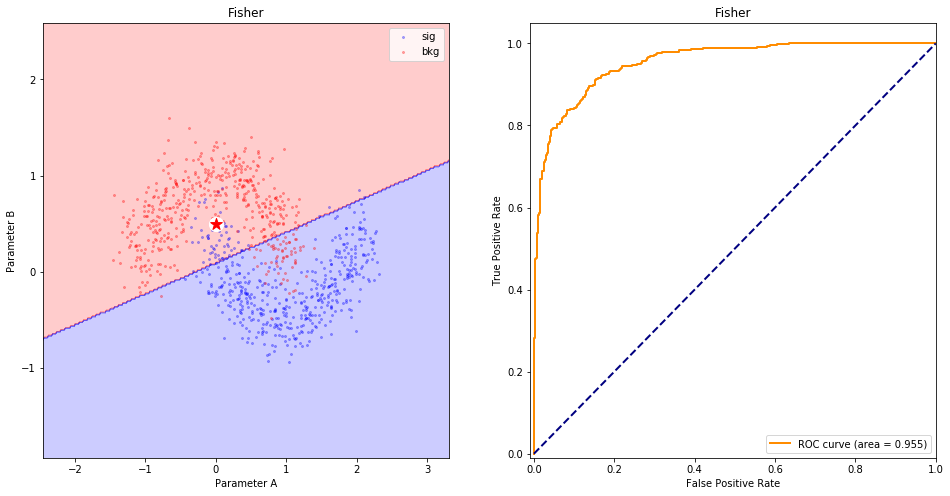

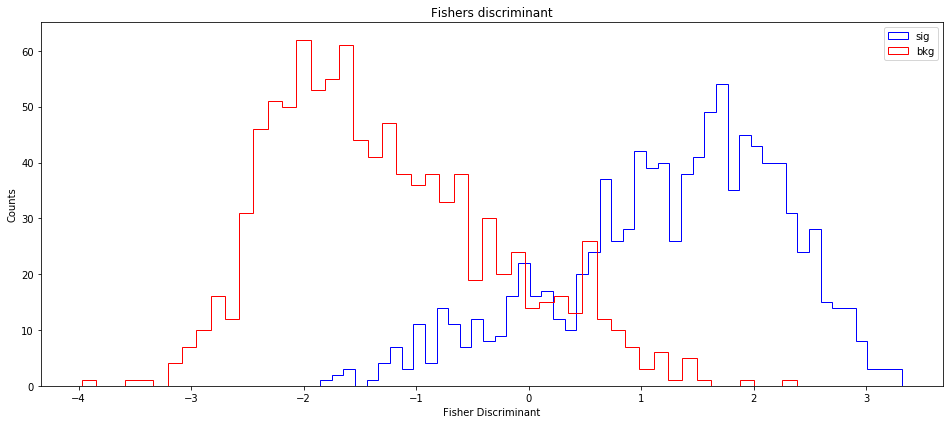

In [252]:
# plot decision region of fisher
fig_fisher, ax_fisher = plot_decision_regions(x_test, y_test, classifier=clf_fisher, title='Fisher')

if plot_fisher_discriminant:

    # plot fisher discriminant 
    fig_fisher2, ax_fisher2 = plt.subplots(figsize=(13.3, 6))
    ax_fisher2.hist(sig_fisher, Nbins, histtype='step', label='sig', color='blue')
    ax_fisher2.hist(bkg_fisher, Nbins, histtype='step', label='bkg', color='red')
    ax_fisher2.set(xlabel='Fisher Discriminant', ylabel='Counts', title='Fishers discriminant')
    ax_fisher2.legend()
    fig_fisher2.tight_layout()

***
### Linear Fisher Discriminant/Decision Trees/Boosted Decision Trees (BDTs)/k-Nearest Neighbours/Support Vector Machine
2. Try to put all the ROC curves into one final plot, which shows how well the different methods perform.

In [148]:
# load the data
data = np.loadtxt('DataSet_ML.txt')
N = len(data)
Nbins = 50

# data
X = data[:, :2]
y = data[:, 2]

# as signal and background
sig = X[y == 1]
bkg = X[y == 0]

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [253]:
def plot_decision_regions_new(X, y, resolution=0.02, title=None, fig=None, ax=None):
    clf_fisher = LDA(n_components=2) # initialise the LDA method
    clf_fisher.fit(X, y) # fit the data
    names = ["Linear Fisher Discriminant", "Decision Tree", "AdaBoost", "Nearest Neighbors", "Linear SVM", "RBF SVM"] 
    classifiers = [clf_fisher, DecisionTreeClassifier(), AdaBoostClassifier(), KNeighborsClassifier(), SVC(kernel="linear", C=0.025, probability=True), SVC(gamma=2, C=1, probability=True)]
    
    # set up the figure
    if fig is None and ax is None:
        fig, ax = plt.subplots(figsize=(16, 8))
    
    for i in range(len(classifiers)):
        #fig_, ax_ = plot_decision_regions_new(X, y, classifier = classifiers[i], names = names[i], title='ROC Curves by multiple classifiers')
    
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1000, train_size = 1000, random_state = 4)
        classifiers[i].fit(x_train,y_train)
        # compute y prediction probabilities:
        y_predicted_proba = classifiers[i].predict_proba(X)[:, 1]
    
        # Compute ROC curve and ROC area
        FPR, TPR, _ = roc_curve(y, y_predicted_proba)
        roc_auc = auc(FPR, TPR)
    
        lw = 2

        # plot the ROC curve
        ax.plot(FPR, TPR, lw=lw, label='ROC curve (area = %0.3f) by %s' % (roc_auc, names[i]))
        ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        ax.set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05], xlabel='False Positive Rate', ylabel='True Positive Rate')
        ax.legend(loc="lower right")
  

    ax.set(title='Classifier comparison')
        
    return fig, ax

/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/envs/python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: Futu

(<Figure size 1152x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cd66d14d0>)

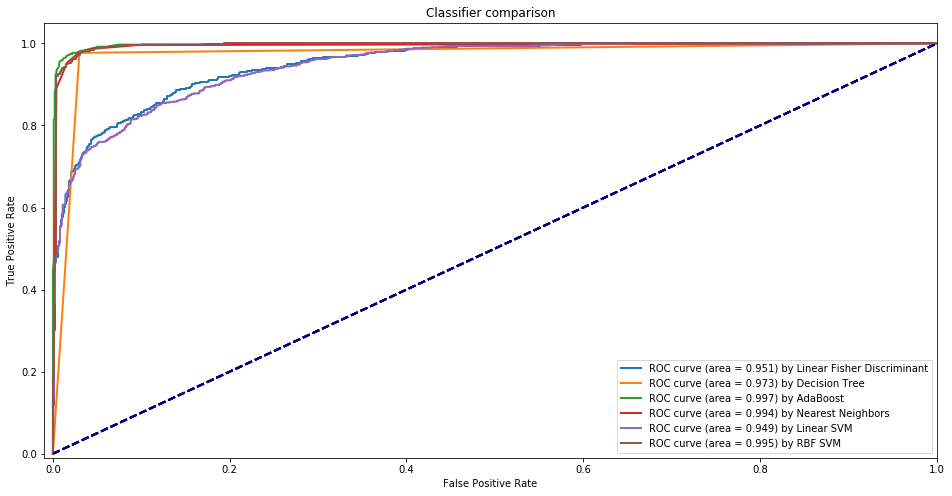

In [254]:
plot_decision_regions_new(X, y)